<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_AD_Bike/blob/main/Ejercicio_AD_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pydot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import Image
from io import StringIO
from joblib import dump

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
bike = pd.read_csv('hour.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bike.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


## Modificaciones de los datos.

In [5]:
bike = bike.drop('instant', axis=1)
bike = bike.drop('casual', axis=1)
bike = bike.drop('registered', axis=1)

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [6]:
bike.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [7]:
bike.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61
17378,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,49


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [8]:
bike.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

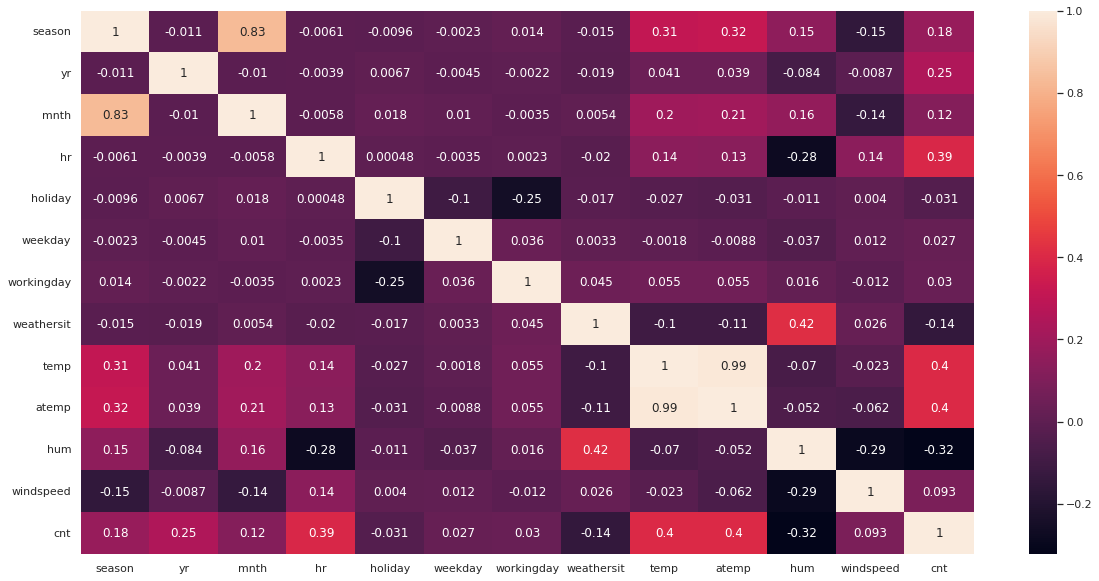

In [9]:
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(bike.corr(), annot=True)

## Seleccionar las características a tener en cuenta en el estudio.

In [10]:
caracteristicas = ['temp', 'hr', 'hum']
resultado = ['cnt']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [11]:
x_bike = bike[caracteristicas]
y_bike = bike[resultado]

## Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_bike, y_bike, test_size=0.20)

# Optimización de hiperparámetros.

## Validación cruzada.

In [13]:
def validacion_cruzada(max_depth, x_train, y_train, criterion):
  kf = KFold(n_splits=5)

  model = DecisionTreeRegressor(max_depth = max_depth, criterion = criterion)
  scores = []

  for train_fold, test_fold in kf.split(x_train):
    model.fit(x_train.values[train_fold], y_train.values[train_fold].ravel())
    y_predict = model.predict(x_train.values[test_fold])
    scores.append(mean_absolute_error(y_train.values[test_fold], y_predict))
  return np.mean(scores)


In [14]:
resultados = []
for criterion in range(4):
  for max_depth in range(1, 16):
    if criterion == 0:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'squared_error'), max_depth, 'squared_error'))
    elif criterion == 1:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'friedman_mse'), max_depth, 'friedman_mse'))
    elif criterion == 2:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'absolute_error'), max_depth, 'absolute_error'))
    elif criterion == 3:
      resultados.append((validacion_cruzada(max_depth, x_train, y_train, 'poisson'), max_depth, 'poisson'))

mejor_resultado = min(resultados)
print(mejor_resultado)

(70.90689097912608, 9, 'absolute_error')


# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [15]:
model = DecisionTreeRegressor(max_depth = mejor_resultado[1], criterion = mejor_resultado[2])

## Realizar una predicción con los datos de prueba.

In [16]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9)

In [17]:
y_predict = model.predict(x_test)

## Mostrar el árbol de decisión resultante.

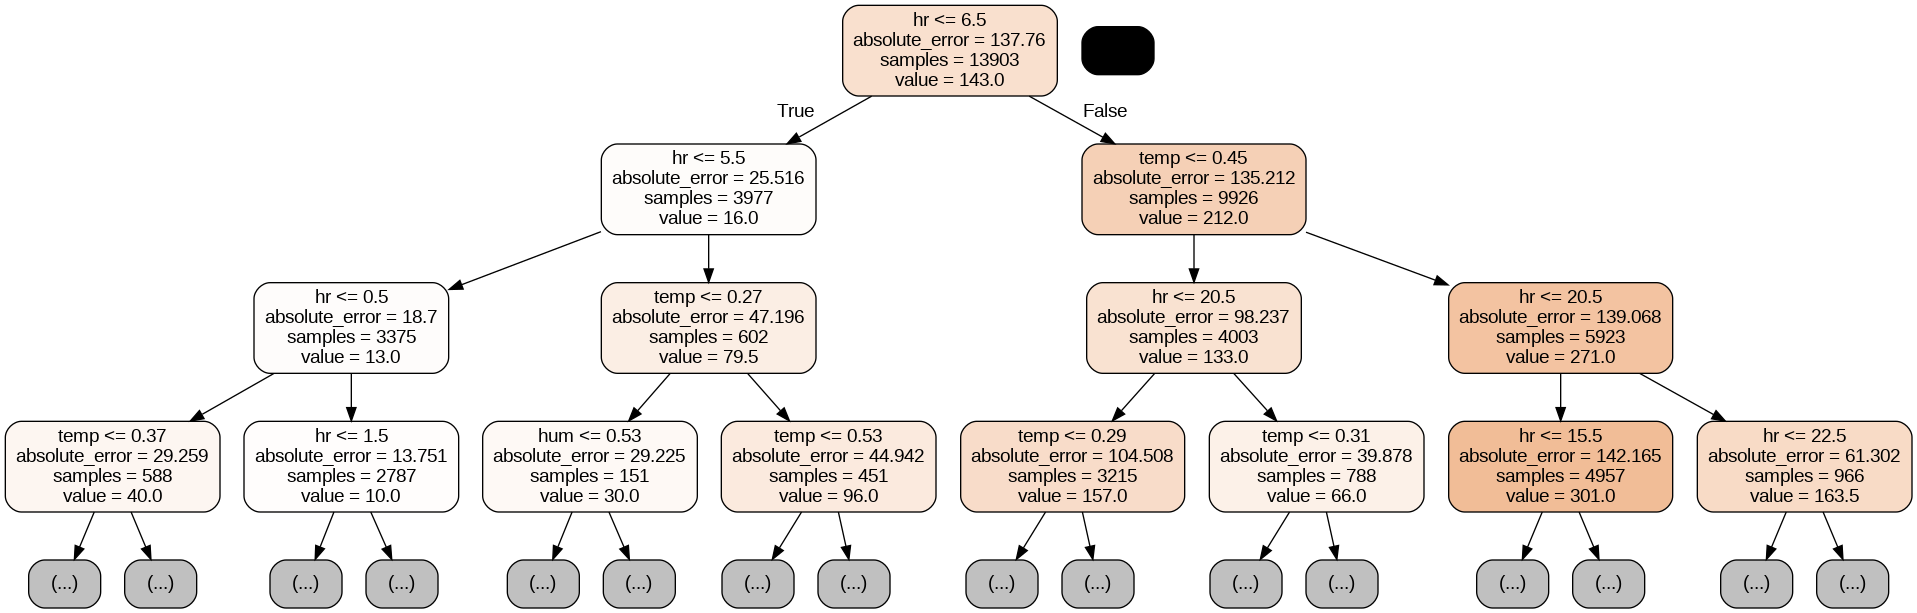

In [26]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, class_names = 'cnt', feature_names = x_train.columns, rounded = True, filled = True, max_depth = 3)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Mostrar la importancia de cada atributo en el árbol resultante.

In [19]:
print('Features Relevances')
pd.DataFrame({'Attributes': ('temp', 'hr', 'hum'), 'Decision Tree': model.feature_importances_ })

Features Relevances


,Attributes,Decision Tree
0,temp,0.192461
1,hr,0.746570
2,hum,0.060969


## Intenta guardar el modelo de predicción ya entrenado usando dump

In [20]:
dump(model, 'modelos_entrenado.AD_Bike')

['modelos_entrenado.AD_Bike']

# Evaluación.

## Mostrar el error cuadrático medio

In [21]:
mean_squared_error(y_test, y_predict)

12123.228495397008

## Mostrar el error absoluto medio

In [22]:
mean_absolute_error(y_test, y_predict)

70.73029344073647

##  Representar gráficamente los valores predichos con los valores reales.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


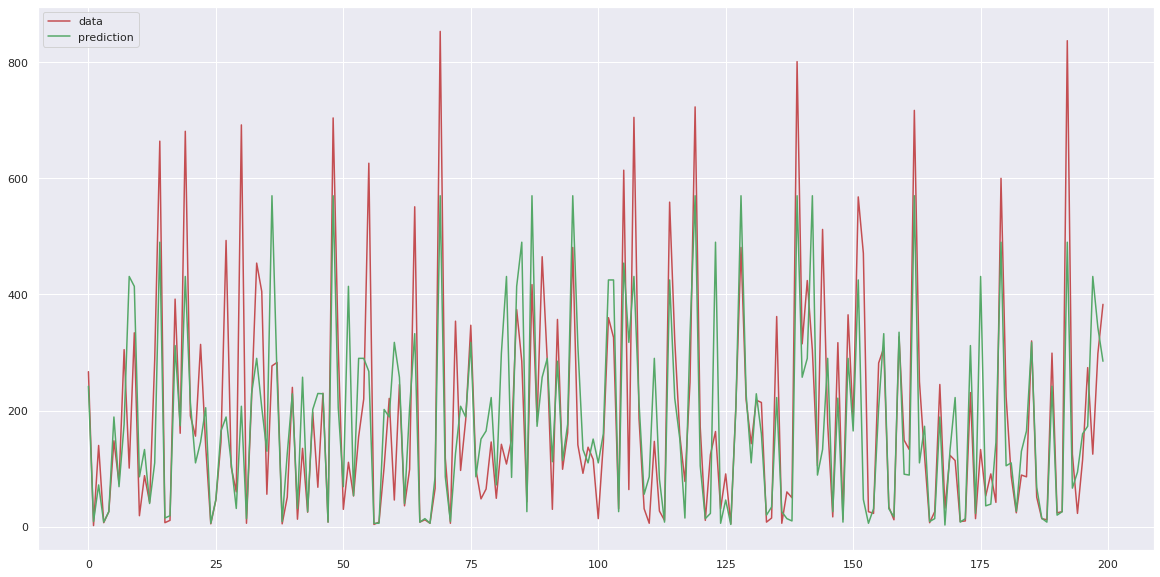

In [23]:
plt.figure(figsize=(20,10))
xx = np.stack(i for i in range(200))
plt.plot(xx, y_test[:200], c='r', label='data')
plt.plot(xx, y_predict[:200], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


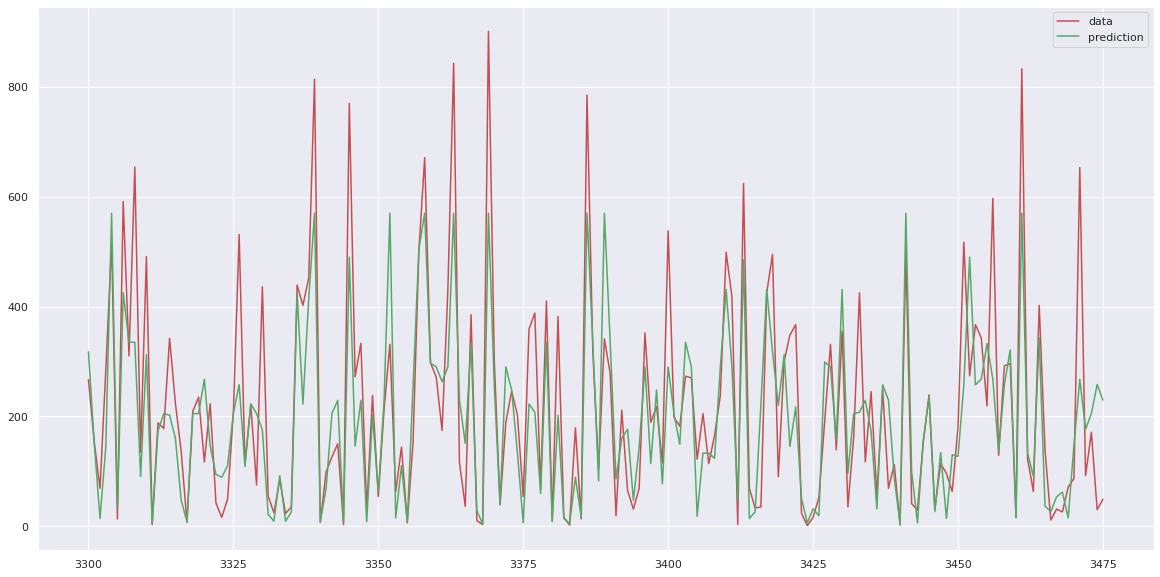

In [24]:
start = 3300
plt.figure(figsize=(20,10))
xx = np.stack(i for i in range(start, y_test.shape[0]))
plt.plot(xx, y_test[start:], c='r', label='data')
plt.plot(xx, y_predict[start:], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()